# Shelter Competition

https://www.kaggle.com/c/shelter-animal-outcomes

1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
    * Cross tabs
    * Transform to numeric and check correlation (ToDo)
4. Missing values treatment (ToDo)
5. Outlier treatment (ToDo)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

/home/ruimendes/conda/envs/data-science-3/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
trainData = pd.read_csv('data/train.csv')
testData = pd.read_csv('data/train.csv')

all_data = pd.concat([trainData, testData])

In [7]:
all_data['DateTime'].max()

'2016-02-21 19:17:00'

In [83]:
trainData.head(3)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White


In [84]:
#trainData.describe()

In [6]:
trainData['Color'].value_counts()

Black/White                    2824
Black                          2292
Brown Tabby                    1635
Brown Tabby/White               940
White                           931
Brown/White                     884
Orange Tabby                    841
Tan/White                       773
Tricolor                        752
Blue/White                      702
Black/Tan                       672
White/Black                     643
Brown                           639
Tan                             628
White/Brown                     569
Tortie                          530
Calico                          517
Orange Tabby/White              455
Blue                            450
Brown Brindle/White             450
Black/Brown                     436
Blue Tabby                      433
White/Tan                       389
Red                             337
Torbie                          335
Brown/Black                     333
Red/White                       331
Blue Tabby/White            

In [11]:
trainData.shape

(26729, 10)

#### Missing values

In [8]:
print(trainData.apply(lambda x: sum(x.isnull().values), axis = 0))

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64


## Univariate Analysis

#### AnimalID

- discard

#### Name

- create new feature (has_name)

In [40]:
nameVar = trainData['Name']

In [77]:
print(nameVar.describe())
print('Missing: ', str(nameVar.isnull().sum()/nameVar.shape[0] * 100) + '%')

count     19038
unique     6374
top         Max
freq        136
Name: Name, dtype: object
Missing:  28.7739907965%


In [78]:
nameVar.value_counts()[:10]

Max         136
Bella       135
Charlie     107
Daisy       106
Lucy         94
Buddy        87
Princess     86
Rocky        85
Luna         68
Jack         66
Name: Name, dtype: int64

In [8]:
trainData["has_name"]=trainData['Name'].apply(lambda e : 1 if pd.isnull(e) else 0 )
trainData["has_name"].value_counts()

0    19038
1     7691
Name: has_name, dtype: int64

#### DateTime

- transform datetime to days
- normalize between 0 and 1

In [23]:
dateTimeVar = trainData['DateTime']

In [38]:
print(dateTimeVar.describe())
print('Missing: ', str(dateTimeVar.isnull().sum()/dateTimeVar.shape[0] * 100) + '%')

count                   26729
unique                  22918
top       2015-08-11 00:00:00
freq                       19
Name: DateTime, dtype: object
0


In [43]:
print('MIN:', dateTimeVar.min())
print('MAX:', dateTimeVar.max())

MIN: 2013-10-01 09:31:00
MAX: 2016-02-21 19:17:00


In [12]:
def agetodays(x):
        try:
            y = x.split()
        except:
            return None 
        if 'year' in y[1]:
            return float(y[0]) * 365
        elif 'month' in y[1]:
            return float(y[0]) * (365/12)
        elif 'week' in y[1]:
            return float(y[0]) * 7
        elif 'day' in y[1]:
            return float(y[0])

In [19]:
trainData['AgeInDays'] = trainData['AgeuponOutcome'].map(agetodays)
trainData.loc[(trainData['AgeInDays'].isnull()),'AgeInDays'] = trainData['AgeInDays'].median()
#print(trainData['AgeInDays'])

In [24]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(trainData['AgeInDays'])
df_normalized = pd.DataFrame(x_scaled)
trainData['AgeInDays'] = df_normalized.values
#trainData['AgeInDays']

/home/ruimendes/conda/envs/Kaggle-Shelter/lib/python3.5/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ruimendes/conda/envs/Kaggle-Shelter/lib/python3.5/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


#### OutcomeType

In [24]:
outcomeTypeVar = trainData['OutcomeType']

In [44]:
print(outcomeTypeVar.describe())
print('Missing: ', str(outcomeTypeVar.isnull().sum()/outcomeTypeVar.shape[0] * 100) + '%')

count        26729
unique           5
top       Adoption
freq         10769
Name: OutcomeType, dtype: object
0


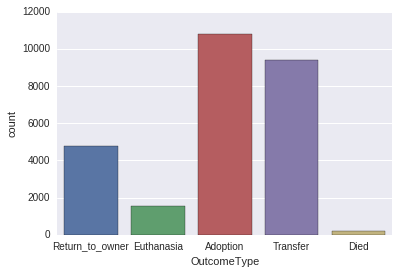

In [103]:
sns.countplot(x="OutcomeType",data=trainData)

#### OutcomeSubtype

In [25]:
outcomeSubtypeVar = trainData['OutcomeSubtype']

In [57]:
print(outcomeSubtypeVar.describe())
print('Missing: ', str(outcomeSubtypeVar.isnull().sum()/outcomeSubtypeVar.shape[0] * 100) + '%')

count       13117
unique         16
top       Partner
freq         7816
Name: OutcomeSubtype, dtype: object
Missing:  50.9259605672%


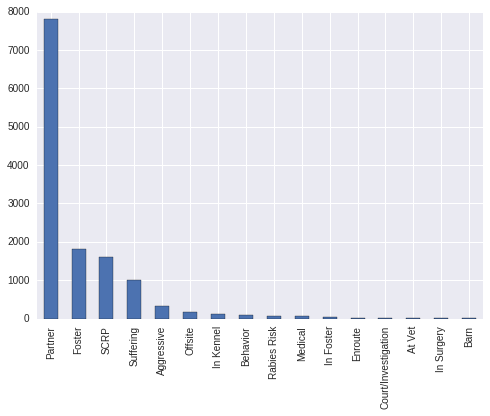

In [59]:
outcomeSubtypeVar.value_counts().plot(kind='bar')

#### AnimalType

In [26]:
animalTypeVar = trainData['AnimalType']

In [60]:
print(animalTypeVar.describe())
print('Missing: ', str(animalTypeVar.isnull().sum()/animalTypeVar.shape[0] * 100) + '%')

count     26729
unique        2
top         Dog
freq      15595
Name: AnimalType, dtype: object
Missing:  0.0%


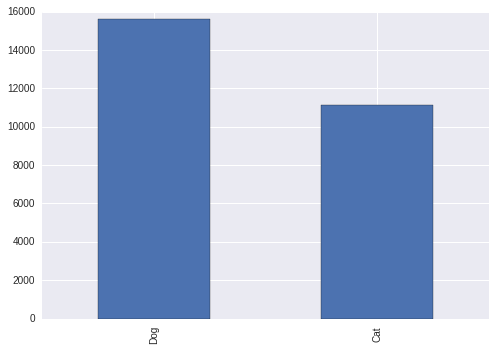

In [61]:
animalTypeVar.value_counts().plot(kind='bar')

#### SexuponOutcome

- fill nulls with the mode
- new feature: is_spayed_or_neutered

In [27]:
sexuponOutcomeVar = trainData['SexuponOutcome']

In [62]:
print(sexuponOutcomeVar.describe())
print('Missing: ', str(sexuponOutcomeVar.isnull().sum()/sexuponOutcomeVar.shape[0] * 100) + '%')

count             26728
unique                5
top       Neutered Male
freq               9779
Name: SexuponOutcome, dtype: object
Missing:  0.00374125481687%


Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64


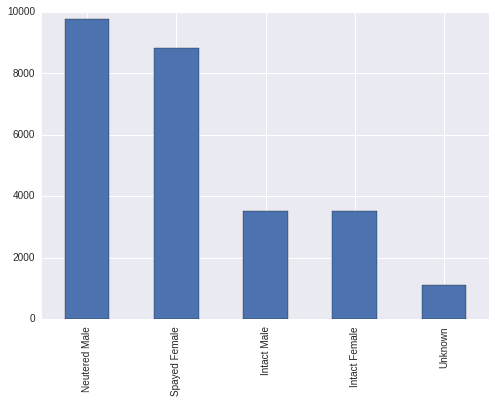

In [82]:
print(sexuponOutcomeVar.value_counts())
sexuponOutcomeVar.value_counts().plot(kind='bar')

In [42]:
trainData.loc[(trainData['SexuponOutcome'].isnull()),'SexuponOutcome'] = trainData['SexuponOutcome'].mode()
trainData['SexuponOutcome']

0        Neutered Male
1        Spayed Female
2        Neutered Male
3          Intact Male
4        Neutered Male
5        Intact Female
6          Intact Male
7              Unknown
8        Spayed Female
9        Spayed Female
10             Unknown
11       Spayed Female
12       Neutered Male
13       Neutered Male
14       Neutered Male
15       Neutered Male
16         Intact Male
17       Intact Female
18       Intact Female
19       Neutered Male
20         Intact Male
21       Spayed Female
22       Spayed Female
23       Neutered Male
24       Neutered Male
25       Intact Female
26       Spayed Female
27       Spayed Female
28       Spayed Female
29       Neutered Male
             ...      
26699    Neutered Male
26700      Intact Male
26701    Intact Female
26702    Spayed Female
26703    Neutered Male
26704    Intact Female
26705    Intact Female
26706    Spayed Female
26707          Unknown
26708    Neutered Male
26709    Spayed Female
26710    Intact Female
26711    In

#### AgeuponOutcome

- transform to days
- fill nulls (median)
- normalize between 0 and 1

In [28]:
ageuponOutcomeVar = trainData['AgeuponOutcome']

In [65]:
print(ageuponOutcomeVar.describe())
print('Missing: ', str(ageuponOutcomeVar.isnull().sum()/ageuponOutcomeVar.shape[0] * 100) + '%')

count      26711
unique        44
top       1 year
freq        3969
Name: AgeuponOutcome, dtype: object
Missing:  0.0673425867036%


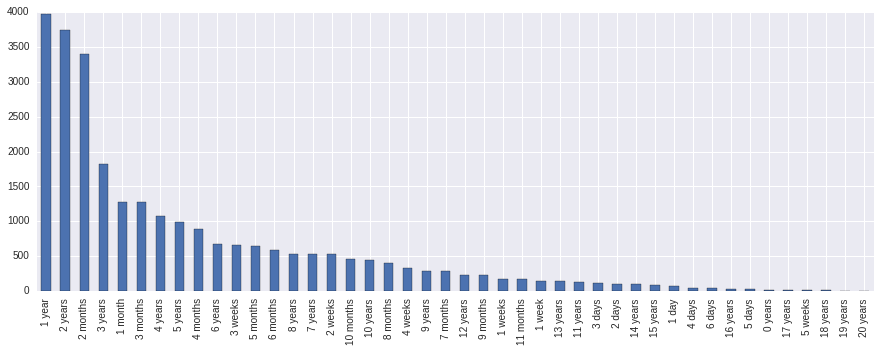

In [79]:
ageuponOutcomeVar.value_counts().plot(kind='bar', figsize=(15,5))

#### Breed

- extract new features: 
  * hair (short, medium, long)
  * is_mix 
      - (data["is_mix"]=data['Breed'].apply(lambda e : '1' if "Mix" in e else '0' ))
      - data.loc[data.Breed.str.contains("Mix"),"mix"]=1
      - data.loc[~data.Breed.str.contains("Mix"),"mix"]=0

In [29]:
breedVar = trainData['Breed']

In [67]:
print(breedVar.describe())
print('Missing: ', str(breedVar.isnull().sum()/breedVar.shape[0] * 100) + '%')

count                      26729
unique                      1380
top       Domestic Shorthair Mix
freq                        8810
Name: Breed, dtype: object
Missing:  0.0%


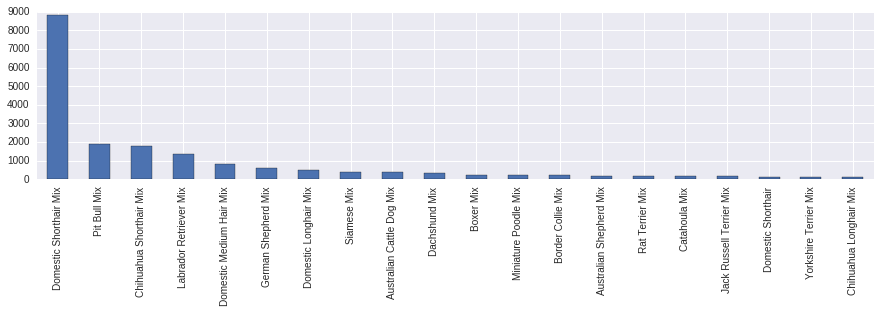

In [75]:
breedVar.value_counts()[0:20].plot(kind='bar', figsize=(15,3))

#### Color

- split colors and transform in columns (binarize for each color)

In [30]:
colorVar = trainData['Color']

In [80]:
print(colorVar.describe())
print('Missing: ', str(colorVar.isnull().sum()/colorVar.shape[0] * 100) + '%')

count           26729
unique            366
top       Black/White
freq             2824
Name: Color, dtype: object
Missing:  0.0%


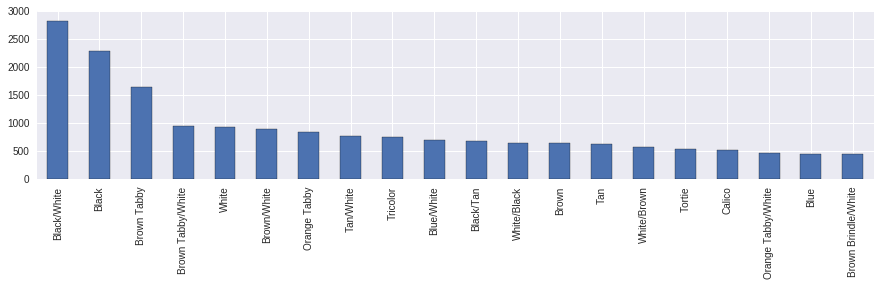

In [81]:
colorVar.value_counts()[0:20].plot(kind='bar', figsize=(15,3))

In [ ]:
trainData['Color'].apply(lambda e : 

In [40]:
trainData['has_multiple_colors'] = trainData['Color'].apply(lambda e : 1 if len(str(e).split('/')) > 1 else '0' )
cenas = trainData[['has_multiple_colors', 'Color']]
cenas

,has_multiple_colors,Color
0,1,Brown/White
1,0,Cream Tabby
2,1,Blue/White
3,0,Blue Cream
4,0,Tan
5,1,Black/Tan
6,0,Blue Tabby
7,0,Brown Tabby
8,1,Red/White
9,0,White


## Bi-variate Analysis

Name, DateTime, OutcomeType, OutcomeSubtype, AnimalType, SexuponOutcome, AgeuponOutcome, Breed, Color

In [86]:
# Table of OutcomeSubtype vs OutcomeSubtype
OutcomeType_class_1 = pd.crosstab(index=trainData["OutcomeType"], 
                            columns=trainData["OutcomeSubtype"])

OutcomeType_class_1

OutcomeSubtype,Aggressive,At Vet,Barn,Behavior,Court/Investigation,Enroute,Foster,In Foster,In Kennel,In Surgery,Medical,Offsite,Partner,Rabies Risk,SCRP,Suffering
OutcomeType,,,,,,,,,,,,,,,,
Adoption,0,0,1,0,0,0,1800,0,0,0,0,165,0,0,0,0
Died,0,4,0,0,0,8,0,52,114,3,0,0,0,0,0,0
Euthanasia,320,0,0,86,6,0,0,0,0,0,66,0,0,74,0,1002
Transfer,0,0,1,0,0,0,0,0,0,0,0,0,7816,0,1599,0


In [104]:
# Table of OutcomeSubtype vs AnimalType
OutcomeType_class_2 = pd.crosstab(index=trainData["OutcomeType"], 
                            columns=trainData["AnimalType"])

OutcomeType_class_2

AnimalType,Cat,Dog
OutcomeType,,
Adoption,4272,6497
Died,147,50
Euthanasia,710,845
Return_to_owner,500,4286
Transfer,5505,3917


In [105]:
# Table of OutcomeSubtype vs SexuponOutcome
OutcomeType_class_3 = pd.crosstab(index=trainData["OutcomeType"], 
                            columns=trainData["SexuponOutcome"])

OutcomeType_class_3

SexuponOutcome,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown
OutcomeType,,,,,
Adoption,203,158,5222,5186,0
Died,56,79,19,18,25
Euthanasia,401,477,344,232,101
Return_to_owner,301,477,2247,1748,12
Transfer,2550,2334,1947,1636,955


In [115]:
# Table of OutcomeSubtype vs AgeuponOutcome
OutcomeType_class_4 = pd.crosstab(index=trainData["OutcomeType"], 
                            columns=trainData["AgeuponOutcome"], margins=True)

OutcomeType_class_4

AgeuponOutcome,0 years,1 day,1 month,1 week,1 weeks,1 year,10 months,10 years,11 months,11 years,...,6 days,6 months,6 years,7 months,7 years,8 months,8 years,9 months,9 years,All
OutcomeType,,,,,,,,,,,,,,,,,,,,,
Adoption,0,0,444,0,0,1623,238,108,80,32,...,0,291,204,139,151,205,166,94,86,10769
Died,1,2,48,3,3,13,1,9,0,0,...,4,2,0,2,3,0,1,0,1,197
Euthanasia,2,0,131,6,6,184,6,69,2,14,...,0,17,53,8,41,9,51,9,38,1553
Return_to_owner,0,6,11,0,0,732,51,156,34,62,...,0,47,251,32,217,50,199,54,113,4786
Transfer,19,58,647,137,162,1417,161,104,50,18,...,46,231,162,107,119,138,119,67,50,9406
All,22,66,1281,146,171,3969,457,446,166,126,...,50,588,670,288,531,402,536,224,288,26711


In [116]:
# Table of OutcomeSubtype vs Breed
OutcomeType_class_5 = pd.crosstab(index=trainData["OutcomeType"], 
                            columns=trainData["Breed"], margins=True)

OutcomeType_class_5

Breed,Abyssinian Mix,Affenpinscher Mix,Afghan Hound Mix,Airedale Terrier,Airedale Terrier Mix,Airedale Terrier/Labrador Retriever,Airedale Terrier/Miniature Schnauzer,Akita,Akita Mix,Akita/Australian Cattle Dog,...,Yorkshire Terrier/Dachshund Wirehair,Yorkshire Terrier/Maltese,Yorkshire Terrier/Miniature Poodle,Yorkshire Terrier/Miniature Schnauzer,Yorkshire Terrier/Norfolk Terrier,Yorkshire Terrier/Parson Russell Terrier,Yorkshire Terrier/Pomeranian,Yorkshire Terrier/Rat Terrier,Yorkshire Terrier/Toy Poodle,All
OutcomeType,,,,,,,,,,,,,,,,,,,,,
Adoption,2,4,0,0,1,0,1,2,4,1,...,0,1,5,4,1,1,1,3,0,10769
Died,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,197
Euthanasia,0,0,0,0,0,0,0,1,0,0,...,0,2,0,0,0,0,0,0,0,1555
Return_to_owner,0,2,1,0,2,0,0,0,5,0,...,0,0,3,1,0,0,0,0,1,4786
Transfer,0,0,0,1,2,1,0,0,2,0,...,1,1,4,3,0,0,0,1,0,9422
All,2,6,1,1,5,1,1,3,11,1,...,1,4,12,8,1,1,1,4,1,26729


In [117]:
# Table of OutcomeSubtype vs Color
OutcomeType_class_6 = pd.crosstab(index=trainData["OutcomeType"], 
                            columns=trainData["Color"], margins=True)

OutcomeType_class_6

Color,Agouti,Agouti/Brown Tabby,Apricot,Apricot/Brown,Apricot/White,Black,Black Brindle,Black Brindle/Black,Black Brindle/Brown,Black Brindle/Brown Brindle,...,White/Yellow Brindle,Yellow,Yellow Brindle,Yellow Brindle/Blue,Yellow Brindle/Tan,Yellow Brindle/White,Yellow/Black,Yellow/White,Yellow/Yellow,All
OutcomeType,,,,,,,,,,,,,,,,,,,,,
Adoption,0,1,8,0,1,843,8,0,1,0,...,2,60,6,1,0,9,1,16,0,10769
Died,0,0,0,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,197
Euthanasia,0,0,0,0,0,145,2,0,0,1,...,0,6,0,0,0,4,0,3,0,1555
Return_to_owner,1,0,6,1,1,312,5,1,1,0,...,2,78,2,0,1,2,0,13,1,4786
Transfer,0,0,7,1,1,972,5,0,1,0,...,0,41,4,0,0,2,0,10,0,9422
All,1,1,21,2,3,2292,20,1,3,1,...,4,185,12,1,1,17,1,43,1,26729
